In [3]:
import pandas as pd

In [4]:
from matplotlib import pyplot as plt

In [101]:
happiness_data = pd.read_csv('CSVs/Happiness/2015.csv')
happiness_data

,Country,Region,Happiness Rank,Score,Standard Error,Economy,Family,Health,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [102]:
happiness_data = pd.read_csv('CSVs/Happiness/2015.csv')
us_happiness = happiness_data[happiness_data.Country == "United States"]
for i in range(16, 20):
    happiness_data = pd.read_csv('CSVs/Happiness/20' + str(i) + '.csv')
    us_happiness = us_happiness.append(happiness_data[happiness_data.Country == "United States"])
us_happiness.insert(0, 'Year', ['2015', '2016', '2017', '2018', '2019'])
us_happiness

,Year,Country,Region,Happiness Rank,Score,Standard Error,Economy,Family,Health,Freedom,...,Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Happiness.Rank,Whisker.high,Whisker.low,Overall rank,Social support,Perceptions of corruption
14,2015,United States,North America,15.0,7.119,0.03839,1.394510,1.247110,0.861790,0.546040,...,0.401050,2.510110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2016,United States,North America,13.0,7.104,NaN,1.507960,1.047820,0.779000,0.481630,...,0.410770,2.727820,7.02,7.188,NaN,NaN,NaN,NaN,NaN,NaN
13,2017,United States,NaN,NaN,6.993,NaN,1.546259,1.419921,0.774287,0.505741,...,0.135639,2.218113,NaN,NaN,14.0,7.074657,6.911343,NaN,NaN,NaN
17,2018,United States,NaN,NaN,6.886,NaN,1.398000,NaN,0.819000,0.547000,...,0.291000,NaN,NaN,NaN,NaN,NaN,NaN,18.0,1.471,0.133
18,2019,United States,NaN,NaN,6.892,NaN,1.433000,NaN,0.874000,0.454000,...,0.280000,NaN,NaN,NaN,NaN,NaN,NaN,19.0,1.457,0.128


In [103]:
us_score = us_happiness[['Year', 'Score','Economy', 'Health', 'Generosity', 'Freedom']]
us_score

,Year,Score,Economy,Health,Generosity,Freedom
14,2015,7.119,1.394510,0.861790,0.401050,0.546040
12,2016,7.104,1.507960,0.779000,0.410770,0.481630
13,2017,6.993,1.546259,0.774287,0.135639,0.505741
17,2018,6.886,1.398000,0.819000,0.291000,0.547000
18,2019,6.892,1.433000,0.874000,0.280000,0.454000


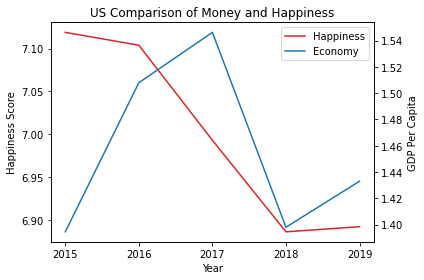

In [104]:
fig, ax1 = plt.subplots()
color = 'tab:red'
lns1 = ax1.plot(us_score.Year, us_score.Score, color=color, label="Happiness")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
lns2 = ax2.plot(us_score.Year, us_score.Economy, color=color, label="Economy")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

ax1.legend(lines, labels, loc=0)
ax1.set_title("US Comparison of Money and Happiness")
ax1.set_xlabel("Year")
ax1.set_ylabel("Happiness Score")
ax2.set_ylabel("GDP Per Capita")

fig.tight_layout()
plt.show()

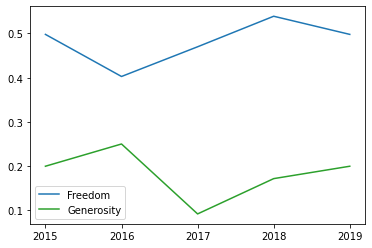

In [87]:
color = 'tab:blue'
lns2 = plt.plot(us_score.Year, us_score.Freedom, color=color, label="Freedom")
color = 'tab:green'
lns3 = plt.plot(us_score.Year, us_score.Generosity, color=color, label="Generosity")

plt.legend(["Freedom","Generosity"])

fig.tight_layout()
plt.show()

In [56]:
us_happiness = happiness_data[happiness_data.Country == "United States"]
for i in range(16, 20):
    happiness_data = pd.read_csv('CSVs/Happiness/20' + str(i) + '.csv')
    us_happiness = us_happiness.append(happiness_data[happiness_data.Country == "United States"])
us_happiness.insert(0, 'Year', ['2015', '2016', '2017', '2018', '2019'])
us_happiness

,Year,Overall rank,Country,Score,Economy,Social support,Health,Freedom to make life choices,Generosity,Perceptions of corruption,...,Lower Confidence Interval,Upper Confidence Interval,Family,Freedom,Trust (Government Corruption),Dystopia Residual,Happiness.Rank,Whisker.high,Whisker.low,GDP per capita
18,2015,19.0,United States,6.892,1.433000,1.457,0.874000,0.454,0.280000,0.128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2016,NaN,United States,7.104,1.507960,NaN,0.779000,NaN,0.410770,NaN,...,7.02,7.188,1.047820,0.481630,0.148680,2.727820,NaN,NaN,NaN,NaN
13,2017,NaN,United States,6.993,1.546259,NaN,0.774287,NaN,0.135639,NaN,...,NaN,NaN,1.419921,0.505741,0.392579,2.218113,14.0,7.074657,6.911343,NaN
17,2018,18.0,United States,6.886,NaN,1.471,0.819000,NaN,0.291000,0.133,...,NaN,NaN,NaN,0.547000,NaN,NaN,NaN,NaN,NaN,1.398
18,2019,19.0,United States,6.892,1.433000,1.457,0.874000,0.454,0.280000,0.128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
